In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

Notes: 
- the peak at the end seems like it is there due to the shift in the vortex trajectories. The relative differences stay constant despite trying to cut off the end of the samples because if the samples are the same length at the beginning and then the same amount is cut off, it doesn't affect their offset that causes one trajectory to end up being longer after shifting. This is why the feature of the upshoot at the end is constant even if time is cut off at the beginning. 

In [62]:
# analyze the later steps in samples2 later, but for now let's just combine all the samples for the shorter range 

samples1 = np.loadtxt('csvT1_S200_s500000_alltraj.csv')
samples2 = np.loadtxt('T1_S67_s750000_desktop1_alltraj.csv')

samples3 = np.loadtxt('S200_s750000_desktop2_alltraj.csv')

print(np.shape(samples1)) 


(200, 2002)


In [2]:
sample_arr = np.loadtxt('csvT1_S200_s500000_alltraj.csv')
avg_arr = np.loadtxt('csvT1_S200_s500000.csv')
orig_samples = sample_arr.copy() 

In [52]:
angle_arr = np.loadtxt('csvT1_S200_s500000_ang.csv')

In [63]:
sample_arr = np.vstack((samples1, samples2[:,0:2002], samples3[:,0:2002]))
orig_samples = sample_arr.copy() 

In [64]:
# sample_arr = np.loadtxt('csvT1_S200_s500000_alltraj.csv')
# avg_arr = np.loadtxt('csvT1_S200_s500000.csv')

# print(sample_arr.shape)

time0 = 300 # initial time to start counting 
sample_arr = sample_arr.T[time0:]# throw away the parts of the array that are at t < time0 
distance0 = 10.2 # threshold distance - everything that reaches this point after t = time0 can be counted 


sample_arr = sample_arr.T
# orig_samples = sample_arr.copy() 
print(sample_arr.shape)

(467, 1702)


In [65]:
# filter to choose the parts of the array that are counted: 
num_removed = 0 
for i in range(len(sample_arr)): 
    if sample_arr[i][0] > distance0:
        num_removed += 1 
        sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the array to nan to eliminate it 
print(num_removed/len(sample_arr))

valid_trajectories = [] 
threshold_time = [] 

added = 0
for i in range(len(sample_arr)): # iterate over the samples 
    for j in range(len(sample_arr[0])): # iterate over time 
        if sample_arr[i][j] != np.nan and sample_arr[i][j] >= distance0: 
            added+= 1
            time = j 
            threshold_time.append(j)
            valid_trajectories.append(sample_arr[i].copy())
            sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the row equal to nan to avoid repeats
            continue  




0.20556745182012848


In [66]:
# stats
too_high = num_removed/len(sample_arr) 
too_low = (len(sample_arr) - added - num_removed)/len(sample_arr)
print(too_high) 
print(too_low)
print(too_high+too_low)


0.20556745182012848
0.4668094218415418
0.6723768736616702


In [6]:
# distances = np.arange(9, 11, 0.1)

# throw_away_per = np.zeros_like(distances)


# time0 = 300 # initial time to start counting 
# # throw away the parts of the array that are at t < time0
# for d in range(len(distances)): 
#     sample_arr = orig_samples.copy() 
#     sample_arr = sample_arr.T[time0:]
#     distance0 = distances[d] # threshold distance - everything that reaches this point after t = time0 can be counted 


#     sample_arr = sample_arr.T
#     num_removed = 0 
#     for i in range(len(sample_arr)): 
#         if sample_arr[i][0] > distance0:
#             num_removed += 1 
#             sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the array to nan to eliminate it 


#     valid_trajectories = [] 
#     threshold_time = [] 

#     added = 0
#     for i in range(len(sample_arr)): # iterate over the samples 
#         for j in range(len(sample_arr[0])): # iterate over time 
#             if sample_arr[i][j] != np.nan and sample_arr[i][j] >= distance0: 
#                 added+= 1
#                 time = j 
#                 threshold_time.append(j)
#                 valid_trajectories.append(sample_arr[i].copy())
#                 sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the row equal to nan to avoid repeats
#                 continue

#     too_high = num_removed/len(sample_arr) 
#     too_low = (len(sample_arr) - added - num_removed)/len(sample_arr)
#     print("Distance: ", distances[d])
#     print(too_high) 
#     print(too_low)
#     print(too_high+too_low)
#     throw_away_per[d] = too_high + too_low


In [8]:
# plt.plot(distances, throw_away_per, marker = 'o')
# plt.grid(True)

In [67]:
print(np.shape(valid_trajectories))
print(np.shape(orig_samples))

(153, 1702)
(467, 2002)


In [10]:
# plt.figure() 
# for i in range(len(sample_arr)): 
#     if sample_arr[i].all() != np.nan: 
#         plt.plot(sample_arr[i], marker = 'o', label = i)
#plt.legend() 

0
1
2
3
4
5
6
7
8


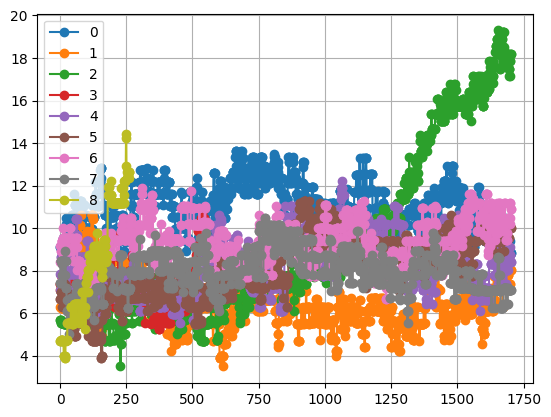

In [68]:
for i in range(9): 
    print(i)
    plt.plot(np.linspace(0,len(valid_trajectories[i]),len(valid_trajectories[i])), valid_trajectories[i], marker = 'o', label = i)
plt.legend() 
plt.grid(True)

In [12]:
# #default_x = np.linspace(0,len(threshold_time), len(threshold_time))
# for i in range(40,50): 
#     xaxis = np.linspace(-threshold_time[i], len(valid_trajectories[i])-threshold_time[i], len(valid_trajectories[i]))
#     plt.plot(xaxis, valid_trajectories[i])
#     plt.vlines(0, 4, 20, linewidth = 3, color = 'black')
#     plt.hlines(9, -500, 1500, linewidth = 3, color = 'black')
#     plt.xlim(-1,1)
#     plt.ylim(8,10)


In [69]:
# remove trajectory values that correspond to negative time
valid_trajectories_0start = [] 
max_length = max(map(len, valid_trajectories))

#print(max_length)
for i in range(len(valid_trajectories)): 
    # xaxis = np.linspace(-threshold_time[i], len(valid_trajectories[i])-threshold_time[i], len(valid_trajectories[i]))
    # ind = np.where(np.abs(xaxis) < 0.1 )[0]
    # print(xaxis[0:20])
    # print(ind)

    adjusted_trajectory = valid_trajectories[i][threshold_time[i]:]
    # print(threshold_time[i])
    # print(np.shape(adjusted_trajectory))
    padded_trajectory = np.pad(adjusted_trajectory, (0,max_length-len(adjusted_trajectory)), 'constant', constant_values = np.nan)
    
    valid_trajectories_0start.append(np.pad(adjusted_trajectory, (0,max_length-len(adjusted_trajectory)), 'constant', constant_values = np.nan)) 
    

In [70]:
print(np.shape(valid_trajectories_0start))

(153, 1702)


In [16]:
# for i in range(100,120): 
#     plt.plot(valid_trajectories_0start[i], marker = 'o')
# #plt.plot(avg_shifted_traj, marker = 'o', linewidth = 3, color = 'black')
# plt.grid(True)
# # calculate the average

In [17]:
# plt.figure() 
# #for i in range(len(valid_trajectories_0start[0:20])): 
# for i in range(100, 102):
#     plt.plot(valid_trajectories_0start[i], marker = 'o', label = i)
#     print(len(valid_trajectories_0start[i]))
# avg_shifted_traj = np.ma.average(np.ma.masked_array(valid_trajectories_0start[100:102], np.isnan(valid_trajectories_0start[100:102])), axis = 0)
# #plt.legend() 

# plt.plot(avg_shifted_traj, marker = 'o', linewidth = 3, color = 'black')
# plt.grid(True)

In [18]:
# plt.figure() 
# for i in range(len(valid_trajectories_0start)): 
#     plt.plot(valid_trajectories_0start[i], marker = 'o', label = i)
# avg_shifted_traj = np.ma.average(np.ma.masked_array(valid_trajectories_0start, np.isnan(valid_trajectories_0start)), axis = 0)
# #plt.legend() 

# plt.plot(avg_shifted_traj, marker = 'o', linewidth = 3, color = 'black')
# plt.grid(True)

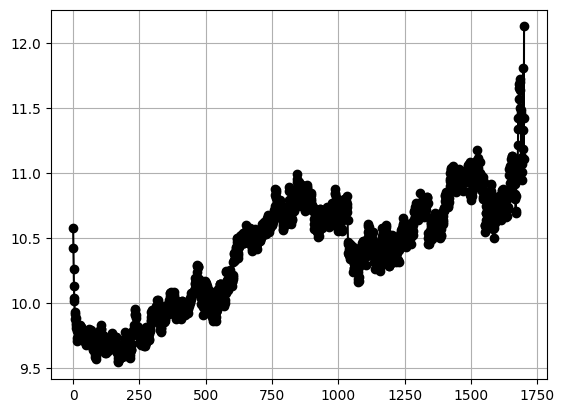

In [72]:
avg_shifted_traj = np.ma.average(np.ma.masked_array(valid_trajectories_0start, np.isnan(valid_trajectories_0start)), axis = 0)
plt.figure() 
plt.plot(avg_shifted_traj, marker = 'o', color = 'black')
plt.grid(True)

In [50]:
print(avg_shifted_traj)

[10.61045762357021 10.463002484368971 10.328459182487098 ...
 11.142255740726572 12.128261481453144 --]


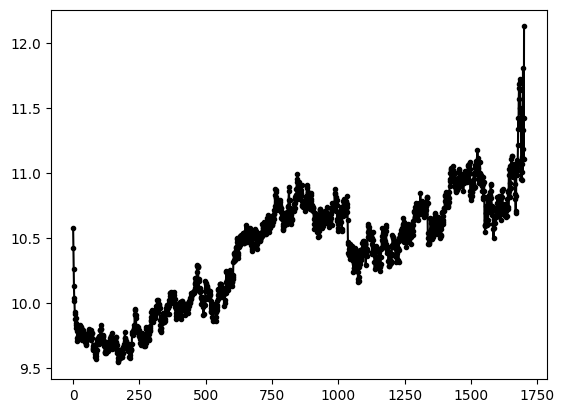

In [73]:
# plt.plot(avg_arr, marker = 'o')
plt.plot(avg_shifted_traj, marker = 'o', color = 'black', markersize = 3)
# plt.vlines(300,2,11)
# plt.hlines(9.2,0,2000)

### Angle Analysis

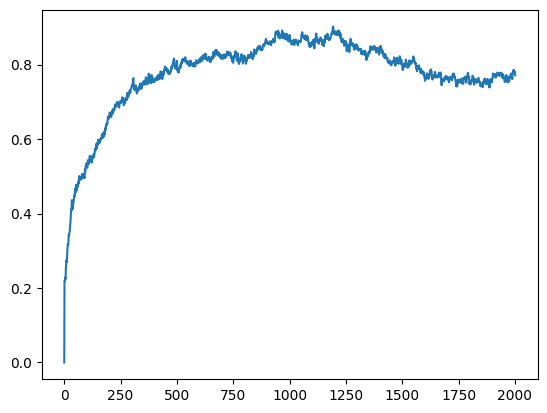

In [58]:
plt.plot(angle_arr)

For Monday: 
- Investigate the results from the simulations run over the weekend - there will be more samples and a longer time scale so hopefully some more conclusive results 
- I think the sharp peak at the end is the result of not enough data that survives until the end. Some samples are longer than others and the longer samples end up with vortices that move far from each other
- I need to still investigate the initial peak - do a lot of trajectories drop initially? Why is this here? This sharp decline implies that most trajectories hit the threshold and then decline in distance a bit. Why would this be the case? Is this the case for the new samples too? Can also add these new samples to this group of samples to see. Also plot the uncertainty! 

### For a single sample, investigate the results 

In [99]:
single_sample = np.loadtxt('T1_S1_s7000000_run3_alltraj.csv')
single_sample_ang = np.loadtxt('T0.8_S1_s5000000_run4_alltraj_ang.csv')

In [87]:
print(len(single_sample))

28002


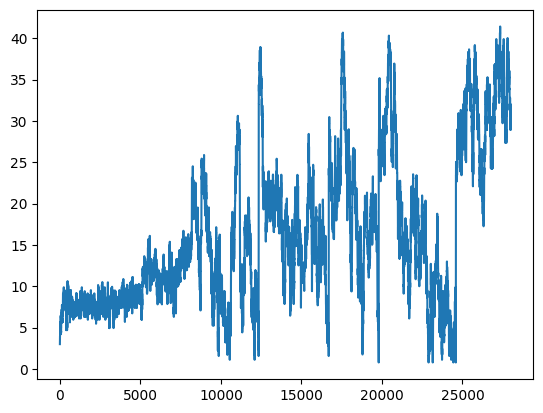

In [95]:
plt.plot(np.where(single_sample > 0)[0], single_sample[np.where(single_sample > 0)])

In [93]:
dt = 0.00030517578125

print(dt*7000000)

2136.23046875


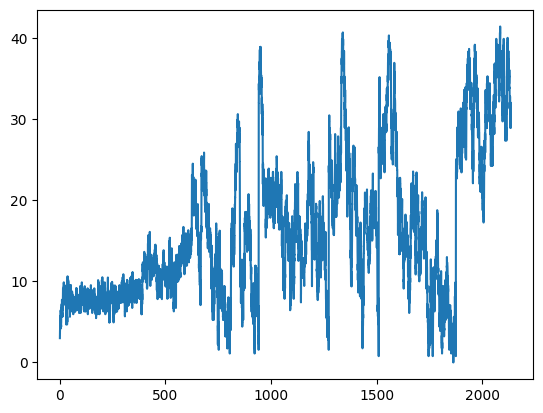

In [96]:
plt.plot(np.linspace(0, dt*7000000, len(single_sample)), single_sample)

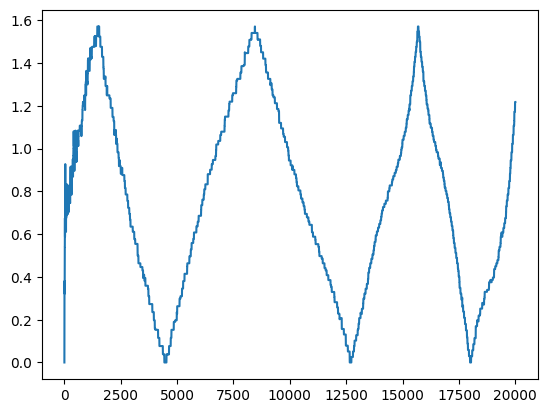

In [100]:
plt.plot(single_sample_ang)

It seeems that even at this temperature, the vortex disappears by colliding into something. Not sure what happened. The vortex seems to stay at a constant distance here though before dissipating. 